In [ ]:
!pip install qiskit
!pip install -q qiskit qiskit-aer pylatexenc --upgrade

In [ ]:
# ============================================
# 🚀 Qiskit Superposition Visualization (Google Colab)
# ============================================

# Step 2: Import libraries
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info import Statevector
from IPython.display import display

# Step 3: Create a 1-qubit quantum circuit
qc = QuantumCircuit(1, 1)   # 1 qubit, 1 classical bit
qc.h(0)                     # Apply Hadamard gate (create superposition)
print(qc.draw('text'))     # Show circuit diagram using text output

# Step 4: Visualize the state on the Bloch sphere
sim = Aer.get_backend('statevector_simulator')
result = sim.run(qc).result()
state = result.get_statevector()
plot_bloch_multivector(state)  # Bloch vector moves to equator → superposition

# Step 5: Measure repeatedly to observe randomness
qc.measure(0, 0)             # Add measurement
print(qc.draw('text')) # Show circuit diagram using text output

# Run 1024 shots to get measurement statistics
sim2 = Aer.get_backend('qasm_simulator')
result2 = sim2.run(qc, shots=1024).result()
counts = result2.get_counts()

# Step 6: Display results
plot_histogram(counts)
print("Measurement results:", counts)

     ┌───┐
  q: ┤ H ├
     └───┘
c: 1/═════
          
     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 
Measurement results: {'0': 548, '1': 476}


In [ ]:
!pip install -q qiskit qiskit-aer pylatexenc --upgrade

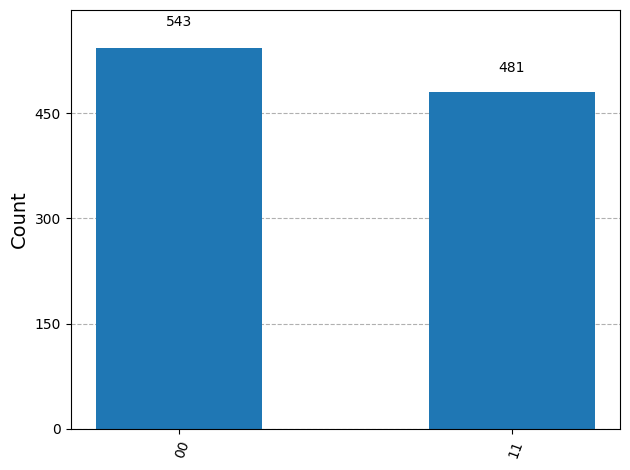

In [3]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Create a 2-qubit circuit
qc = QuantumCircuit(2)

# Apply Hadamard gate to qubit 0 (superposition)
qc.h(0)

# Apply CNOT gate (entanglement)
qc.cx(0, 1)

# Measure both qubits
qc.measure_all()

# Execute
backend = Aer.get_backend('qasm_simulator')
result = backend.run(qc, shots=1024).result()
counts = result.get_counts()

# Visualize
# qc.draw('mpl') # This line is commented out because it requires matplotlib which might not be installed or configured
plot_histogram(counts)

In [2]:
!pip install -q qiskit qiskit-aer pylatexenc --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 100.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.8 MB/s eta 0:00:00


In [7]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
import random

# Quantum dice: use 3 qubits → 2³ = 8 outcomes (we’ll map 1–6)
qc = QuantumCircuit(3)
qc.h([0,1,2])    # Put all in superposition
qc.measure_all()

backend = Aer.get_backend('qasm_simulator')
result = backend.run(qc, shots=1).result()
counts = result.get_counts()

# Convert binary result to dice number
binary_out = list(counts.keys())[0]
dice_num = int(binary_out, 2) % 6 + 1
print(f"You rolled a {dice_num}!")

You rolled a 1!


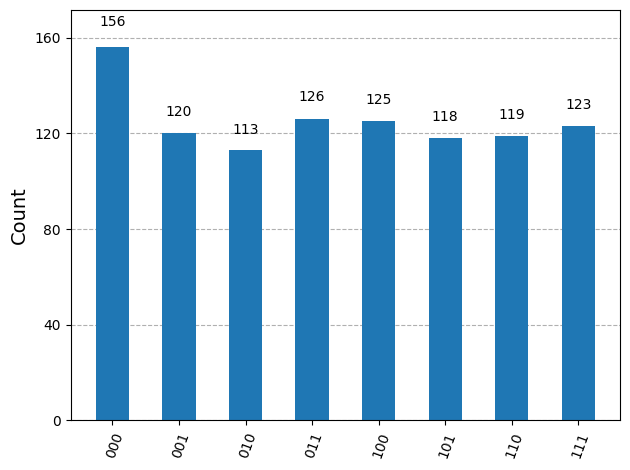

In [9]:
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer # Import Aer backend
from qiskit import QuantumCircuit # Import QuantumCircuit

# Assuming 'qc' and 'backend' are defined in a previous cell
# Create a simple circuit for demonstration if 'qc' is not defined
try:
    qc
except NameError:
    qc = QuantumCircuit(1)
    qc.h(0)
    qc.measure_all()

# Assuming 'backend' is defined in a previous cell
try:
    backend
except NameError:
    backend = Aer.get_backend('qasm_simulator')


shots = 1000
result = backend.run(qc, shots=shots).result() # Use backend.run() instead of execute()
counts = result.get_counts()
plot_histogram(counts)